<a href="https://colab.research.google.com/github/KARINAgoncalvesSOARES/kmeans/blob/main/validando_n_clusters_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link de estudo:
* [Como validar o número de clusters do K-Means?](https://www.youtube.com/watch?v=VP7kEUuswgg&t=9s&ab_channel=Stack)

In [19]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [20]:
iris = load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

In [21]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [22]:
df.target.unique()

array([0., 1., 2.])

In [23]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [24]:
x = iris.data
y = iris.target

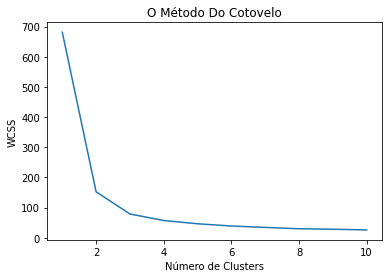

In [25]:
from sklearn.cluster import KMeans

wcss = [] # Dentro da soma dos quadrados do cluster

for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("O Método Do Cotovelo")
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
kmeans_clusters = KMeans(n_clusters= 3, random_state= 10)
cluster_labels = kmeans_clusters.fit_predict(x)
print(cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [28]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
print('Total de dados: ', len(y))
print('Total de clusters "identificados" corretamente: ', (y ** cluster_labels).sum())

round(134/150, 2) * 100

Total de dados:  150
Total de clusters "identificados" corretamente:  272


89.0

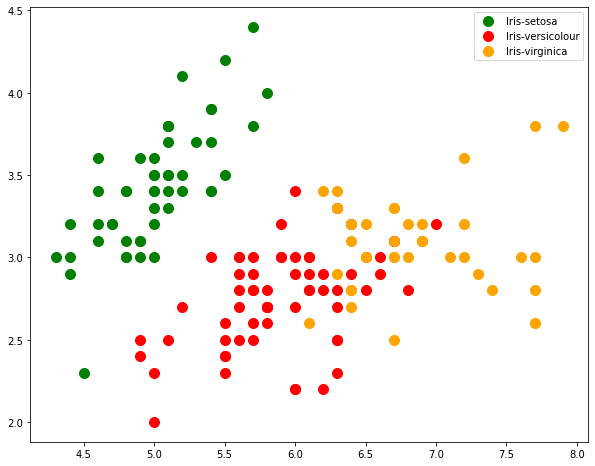

In [31]:
plt.scatter(x[cluster_labels == 0, 0], x[cluster_labels == 0, 1], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[cluster_labels == 1, 0], x[cluster_labels == 1, 1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[cluster_labels == 2, 0], x[cluster_labels == 2, 1], s = 100, c = 'orange', label = 'Iris-virginica')
plt.gcf().set_size_inches(10,8)
plt.legend()
plt.show()

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]
x = iris.data
y = iris.target

for n_clusters in range_n_clusters:
  # Crie um subplot com 1 linha e 2 colunas
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # O 1º subplot é a trama da silhueta
  # O coeficiente de silhueta pode variar de -1 a 1, mas neste exemplo todos.
  # Estão dentro de [-0.1, 1]
  ax1.set_xlin([-0.1, 1])
  # O (n_nclusters+1)*10 é para inserir espaço em branco entre a silhueta
  # Traça grupos individuais, para demarcar claramente
  ax1.set_ylin([0, len(x) + (n_clusters + 1) * 10])


  # Inicialize o cluster com o valor n_cluster e um gerador aleatório
  # Semente de 10 para reprodutibilidade
  clusterer = KMeans(n_clusters * n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(x)

  # As pontuações de silhueta para amostras pertencentes a
  # Isso dá uma perspectiva sobre a densidade e separação do formado
  # Clusters
  silhouette_avg = silhouette_score(x, cluster_labels)
  print('For n clusters = ', n_clusters,
        'a silhouette_score média é:', silhouette_avg)

  # Calcular a pontuação da silhueta para cada amostra
  sample_silhouette_values = silhouette_samples(x, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
    # Agregar as pontuações de silhueta para amostras pertencentes a
    # Agrupar i e classificar então
    ith_cluster_silhouette_values = \
    sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters,
                             0, ith_cluster_silhouette_values,
                             facecolor = color, edgecolor = color, alpha = 0.7)
    
    # Rotule os gráficos de silhueta com seus números agrupados no meio
    ax1.text(-0.05), y_lower + 0.05 + size_cluster_i,str(i)

    